In [1]:
# import the necessary packages
import pandas as pd
import autogluon.core as ag
from autogluon.tabular.configs.hyperparameter_configs import get_hyperparameter_config
from autogluon.tabular import TabularPredictor
import seaborn as sns

In [ ]:
# Downloading the dataset from kaggle
!kaggle competitions download -c bike-sharing-demand
#unzipping on windows cli
!Expand-Archive bike-sharing-demand.zip

# Initial Data Preprocessing 

In [94]:
# create the train dataset in pandas by reading the csv with parsing the date time
train = pd.read_csv('Data/train.csv', parse_dates=['datetime'])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
# create the test dataset in pandas by reading the csv with parsing the date time
test = pd.read_csv('Data/test.csv', parse_dates=['datetime'])
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [4]:
# create the submission dataset in pandas by reading the csv with parsing the date time
submission = pd.read_csv('Data/sampleSubmission.csv', parse_dates=['datetime'])
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [5]:
# drop some unimportant columns
#train.drop(['casual','registered'],
# axis='columns', inplace=True)

In [6]:
# describe the train data frame
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,977.000000


In [7]:
# look the info to see any null or missing data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(6)
memory usage: 850.6 KB


## Initial Training 

In [97]:
ignored_columns = ('casual','registered')

In [112]:
predictor = TabularPredictor(label="count", # traing to predict the "count"
                             problem_type="regression", # regression problem type
                             eval_metric="root_mean_squared_error", # rootmean square error is used is evaluation metric
                             learner_kwargs = {'ignored_columns' : ('casual','registered')} # ignoring the unnecessary columns
                            ).fit(train_data = train , # training the train data frame
                                  
                                  time_limit = 600, # time limit is set as 600 sec (10 minutes)
                                  presets = "best_quality" #choose the preset parameter as best quality
                                 ) 

No path specified. Models will be saved in: "AutogluonModels/ag-20211109_160223\"
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20211109_160223\"
AutoGluon Version:  0.3.1
Train Data Rows:    10886
Train Data Columns: 11
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Dropping user-specified ignored columns: ('casual', 'registered')
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    3527.61 MB
	Train Data (Original)  Memory Usage: 0.96 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 2 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeature

[1000]	train_set's rmse: 3.81021	valid_set's rmse: 4.45826
[2000]	train_set's rmse: 3.00188	valid_set's rmse: 4.00347
[3000]	train_set's rmse: 2.57549	valid_set's rmse: 3.79608
[4000]	train_set's rmse: 2.27743	valid_set's rmse: 3.68307
[5000]	train_set's rmse: 2.05305	valid_set's rmse: 3.61236


KeyboardInterrupt: 

## Reviewing AutoGluon's training run with ranking of models that did the best. 

In [9]:
predictor.fit_summary() # displaying fit summary of predictor

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3 -114.751607       2.995139  500.685478                0.001991           0.355063            3       True         21
1   NeuralNetFastAI_BAG_L2 -115.299516       2.303613  469.514464                0.207113          85.302280            2       True         17
2        LightGBMXT_BAG_L2 -116.173561       2.196379  390.066579                0.099878           5.854395            2       True         12
3          CatBoost_BAG_L2 -116.390382       2.116110  403.683583                0.019609          19.471398            2       True         15
4          LightGBM_BAG_L2 -116.881131       2.146091  388.131036                0.049590           3.918851            2       True         13
5           XGBoost_BAG_L2 -117.456728       2.127745  392.478420         

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'NeuralNetMXNet_BAG_L1': 'StackerEnsembleModel_TabularNeuralNet',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L2': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L2': 'StackerEnsembleModel_XGB

In [10]:
predictor.leaderboard() # displaying the modal leaderboard to see which model has the highest score

                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3 -114.751607       2.995139  500.685478                0.001991           0.355063            3       True         21
1   NeuralNetFastAI_BAG_L2 -115.299516       2.303613  469.514464                0.207113          85.302280            2       True         17
2        LightGBMXT_BAG_L2 -116.173561       2.196379  390.066579                0.099878           5.854395            2       True         12
3          CatBoost_BAG_L2 -116.390382       2.116110  403.683583                0.019609          19.471398            2       True         15
4          LightGBM_BAG_L2 -116.881131       2.146091  388.131036                0.049590           3.918851            2       True         13
5           XGBoost_BAG_L2 -117.456728       2.127745  392.478420                0.031244           8.266235            2       True    

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,-114.751607,2.995139,500.685478,0.001991,0.355063,3,True,21
1,NeuralNetFastAI_BAG_L2,-115.299516,2.303613,469.514464,0.207113,85.302280,2,True,17
2,LightGBMXT_BAG_L2,-116.173561,2.196379,390.066579,0.099878,5.854395,2,True,12
3,CatBoost_BAG_L2,-116.390382,2.116110,403.683583,0.019609,19.471398,2,True,15
4,LightGBM_BAG_L2,-116.881131,2.146091,388.131036,0.049590,3.918851,2,True,13
5,XGBoost_BAG_L2,-117.456728,2.127745,392.478420,0.031244,8.266235,2,True,18
6,ExtraTreesMSE_BAG_L2,-117.541420,2.616958,385.783492,0.520457,1.571307,2,True,16
7,WeightedEnsemble_L2,-118.414605,0.627329,173.135515,0.000998,0.478720,2,True,11
8,RandomForestMSE_BAG_L1,-118.456660,0.332141,1.365433,0.332141,1.365433,1,True,5
9,RandomForestMSE_BAG_L2,-119.168548,2.843133,389.566206,0.746632,5.354021,2,True,14


In [11]:
# predicting the test dataset
predictions = predictor.predict(test)
predictions.head()

0     95.438400
1     93.679375
2     93.680397
3    106.550110
4    106.504105
Name: count, dtype: float32

In [12]:
# Describing the 'predictions' series to see if there are any negative values
predictions.describe()

count    6493.000000
mean      212.110809
std       130.124878
min       -10.815436
25%       106.252129
50%       194.931046
75%       299.357880
max       664.461487
Name: count, dtype: float64

In [13]:
# transform the negative values to zero
predictions = predictions.clip(0)

## Initial Submission ##

In [14]:
submission["count"] = predictions #set prediction to submission dataframe
submission.to_csv("submission.csv", index=False) # export to csv format

*Submitting first result to the Kaggle.*

In [15]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m  "project's first raw submission"  

Successfully submitted to Bike Sharing Demand



  0%|          | 0.00/195k [00:00<?, ?B/s]
  4%|4         | 8.00k/195k [00:06<02:35, 1.23kB/s]
 41%|####1     | 80.0k/195k [00:08<00:09, 12.8kB/s]
 45%|####5     | 88.0k/195k [00:09<00:09, 11.7kB/s]
 49%|####9     | 96.0k/195k [00:10<00:08, 11.4kB/s]
 53%|#####3    | 104k/195k [00:10<00:07, 12.9kB/s] 
 62%|######1   | 120k/195k [00:10<00:04, 18.8kB/s]
 70%|######9   | 136k/195k [00:10<00:02, 25.9kB/s]
 74%|#######3  | 144k/195k [00:10<00:01, 29.3kB/s]
 90%|######### | 176k/195k [00:10<00:00, 50.8kB/s]
 99%|#########8| 192k/195k [00:11<00:00, 62.3kB/s]
100%|##########| 195k/195k [00:17<00:00, 11.2kB/s]


In [16]:
!kaggle competitions submissions -c bike-sharing-demand 

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission.csv               2021-11-09 11:57:37  first real raw submission          complete  1.39358      1.39358       
submission_new_hpo.csv       2021-11-09 06:28:49  new features with hyperparameters  complete  0.56664      0.56664       
submission_new_features.csv  2021-11-07 17:21:11  new features                       complete  0.49544      0.49544       
submission_new_features.csv  2021-11-07 16:21:19  new features                       complete  0.49095      0.49095       
submission.csv               2021-11-07 14:28:31  test2 EDA submission               complete  0.50613      0.50613       
submission.csv               2021-11-07 12:51:00  test EDA submission                complete  0.50777      0.50777       
submission.csv  

**Initial Score of 1.39358** 

## Exploratory Data Analysis and Creating an additional feature ##

array([[<AxesSubplot:title={'center':'datetime'}>,
        <AxesSubplot:title={'center':'season'}>,
        <AxesSubplot:title={'center':'holiday'}>],
       [<AxesSubplot:title={'center':'workingday'}>,
        <AxesSubplot:title={'center':'weather'}>,
        <AxesSubplot:title={'center':'temp'}>],
       [<AxesSubplot:title={'center':'atemp'}>,
        <AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'windspeed'}>],
       [<AxesSubplot:title={'center':'count'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

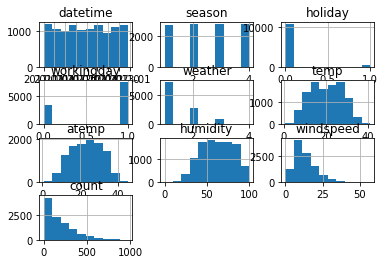

In [17]:
# Create a histogram of all features to show the distribution of each one relative to the data
train.hist()

### Creating new features  on **"Training" & "Test"** data

## Train dataset ##

In [18]:
submission_new_features = pd.read_csv('Data/sampleSubmission.csv' , parse_dates = ['datetime']) # First creating Submission dataset for new model

In [19]:
# splitting datetime columns to each hour,month, year and weekdays
train['hour'] = train['datetime'].dt.hour
train['month']= train['datetime'].dt.month
train['year'] = train['datetime'].dt.year
train['weekday'] = train['datetime'].dt.weekday

In [20]:
# ranking the weekdays 
weekdays={'Sunday':0,
        'Monday':1,
        'Tuesday':2,
        'Wednesday':3,
        'Thursday':4,
        'Friday':5,
        'Saturday':6}
train['weekday']=pd.DatetimeIndex(train['datetime']).day_name() #take weekdays from datetime column
train['weekday']=train['weekday'].map(weekdays) #assign ranking on weekdays

<AxesSubplot:xlabel='hour', ylabel='count'>

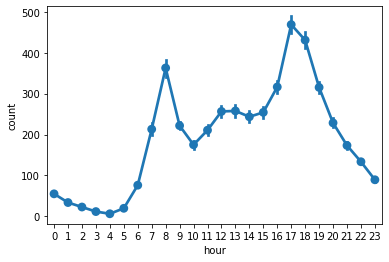

In [21]:
sns.pointplot(x = 'hour', y = 'count', data = train) # plot to see the time range effect over count

In [22]:
# split time of the day into 4 parts
train['dawn'] = train['hour'].between(0,6,inclusive = True)
train['morning'] = train['hour'].between(7,12)#,inclusive=True)
train['evening'] = train['hour'].between(13,19,inclusive=True)
train['night'] = train['hour'].between(20,24)#,inclusive=True)


C:\Users\htina\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  
C:\Users\htina\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  after removing the cwd from sys.path.


In [23]:
train #check the train dataset

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour,month,year,weekday,dawn,morning,evening,night
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,16,0,1,2011,6,True,False,False,False
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,40,1,1,2011,6,True,False,False,False
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,32,2,1,2011,6,True,False,False,False
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,13,3,1,2011,6,True,False,False,False
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,4,1,2011,6,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,336,19,12,2012,3,False,False,True,False
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,241,20,12,2012,3,False,False,False,True
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,168,21,12,2012,3,False,False,False,True
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,129,22,12,2012,3,False,False,False,True


<AxesSubplot:xlabel='temp', ylabel='count'>

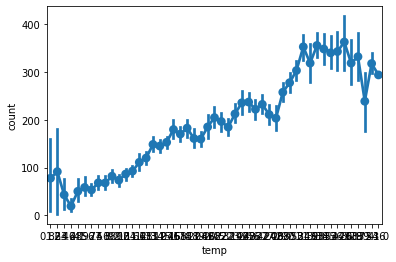

In [24]:
sns.pointplot(x = 'temp', y = 'count', data = train) # plot to see the temperature effect over count

<AxesSubplot:xlabel='atemp', ylabel='count'>

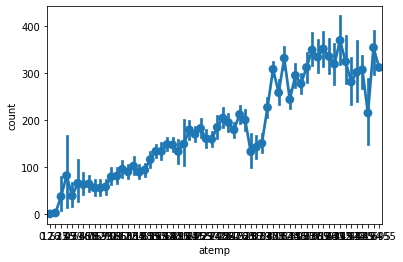

In [25]:
sns.pointplot(x = 'atemp', y = 'count', data = train) # plot to see the actual temperature effect over count

We may only use actual temperature as a factor as the data are not so difference.
And we will categorize the actual temperature into 3 groups.

In [26]:
# set custom variables for high and low based on train dataset's describe! 
atemp_high = 23 
atemp_low = 10 
# getting more features based on actual temperature 
train['hot'] = train['atemp'] >= atemp_high
train['mild'] = train['atemp'].between(atemp_low, atemp_high)
train['cold'] = train['atemp'] <= atemp_low

In [27]:
# let the trainer knows season and weather are not just integers and these are categories 
train["season"] = train["season"].astype("category")
train["weather"] = train["weather"].astype("category")

In [28]:
# dropping the features extracted columns as they are no longer needed
#train.drop(['datetime','atemp', 'temp'],
# axis='columns', inplace=True)
# commenting as we are using 'ignored columns' kwargs in TabularPredictor.

## Test dataset ##

In [29]:
# checking test dataset
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [30]:
# splitting datetime columns to each hour,month, year and weekdays
test['hour'] = test['datetime'].dt.hour
test['month']= test['datetime'].dt.month
test['year'] = test['datetime'].dt.year
test['weekday'] = test['datetime'].dt.weekday

In [31]:
# ranking the weekdays
weekdays={'Sunday':0,
        'Monday':1,
        'Tuesday':2,
        'Wednesday':3,
        'Thursday':4,
        'Friday':5,
        'Saturday':6}
test['weekday']=pd.DatetimeIndex(test['datetime']).day_name() #take weekdays from datetime column
test['weekday']=test['weekday'].map(weekdays) #assign ranking on weekdays

In [32]:
# split time of the day into 4 parts
test['dawn'] = test['hour'].between(0,6,inclusive = True)
test['morning'] = test['hour'].between(7,12)#,inclusive=True)
test['evening'] = test['hour'].between(13,19,inclusive=True)
test['night'] = test['hour'].between(20,24)#,inclusive=True)

C:\Users\htina\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  
C:\Users\htina\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  after removing the cwd from sys.path.


In [33]:
# getting more features based on actual temperature 
test['hot'] = test['atemp'] >= atemp_high
test['mild'] = test['atemp'].between(atemp_low, atemp_high)
test['cold'] = test['atemp'] <= atemp_low

In [34]:
# season and weather are not just integers and these are categories 
test["season"] = test["season"].astype("category")
test["weather"] = test["weather"].astype("category")

In [35]:
# dropping the features extracted columns to match the train data set
#test.drop(['datetime','atemp', 'temp'],
# axis='columns', inplace=True)
test.head()

,season,holiday,workingday,weather,humidity,windspeed,hour,month,year,weekday,dawn,morning,evening,night,hot,mild,cold
0,1,0,1,1,56,26.0027,0,1,2011,4,True,False,False,False,False,True,False
1,1,0,1,1,56,0.0000,1,1,2011,4,True,False,False,False,False,True,False
2,1,0,1,1,56,0.0000,2,1,2011,4,True,False,False,False,False,True,False
3,1,0,1,1,56,11.0014,3,1,2011,4,True,False,False,False,False,True,False
4,1,0,1,1,56,11.0014,4,1,2011,4,True,False,False,False,False,True,False


## Train Again ##

In [3]:
# Train again with features added training dataset
predictor_new_features = TabularPredictor(label="count", # traing to predict the "count"
                             problem_type="regression", # regression problem type
                             eval_metric="root_mean_squared_error", # rootmean square error is used is evaluation metric
                             learner_kwargs = {'ignored_columns' : ('casual','registered','datetime','atemp', 'temp')}
                            ).fit(train_data = train , # training the train data frame
                                  time_limit = 600, # time limit is set as 600 sec (10 minutes)
                                  presets = "best_quality" #choose the preset parameter as best quality
                                 ) 

No path specified. Models will be saved in: "AutogluonModels/ag-20211109_160839\"


NameError: name 'train' is not defined

In [37]:
predictor_new_features.fit_summary() # displaying fit summary of predictor with new features

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -35.744846       3.603138  580.321154                0.000992           0.571487            3       True         17
1      WeightedEnsemble_L2  -36.021803       1.512265  370.741250                0.000000           0.306778            2       True          9
2     ExtraTreesMSE_BAG_L2  -36.225954       2.752859  391.954895                0.406122           1.457816            2       True         14
3          CatBoost_BAG_L2  -36.270929       2.417153  483.124710                0.070416          92.627631            2       True         13
4   NeuralNetFastAI_BAG_L2  -36.294249       2.558212  469.661366                0.211475          79.164287            2       True         15
5          LightGBM_BAG_L2  -36.349232       2.427685  394.738865         

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L2': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L2': 'StackerEnsembleModel_XGBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -115.084892219

In [38]:
predictor_new_features.leaderboard() # displaying the modal leaderboard to see which model has the highest score

                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -35.744846       3.603138  580.321154                0.000992           0.571487            3       True         17
1      WeightedEnsemble_L2  -36.021803       1.512265  370.741250                0.000000           0.306778            2       True          9
2     ExtraTreesMSE_BAG_L2  -36.225954       2.752859  391.954895                0.406122           1.457816            2       True         14
3          CatBoost_BAG_L2  -36.270929       2.417153  483.124710                0.070416          92.627631            2       True         13
4   NeuralNetFastAI_BAG_L2  -36.294249       2.558212  469.661366                0.211475          79.164287            2       True         15
5          LightGBM_BAG_L2  -36.349232       2.427685  394.738865                0.080948           4.241787            2       True    

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,-35.744846,3.603138,580.321154,0.000992,0.571487,3,True,17
1,WeightedEnsemble_L2,-36.021803,1.512265,370.741250,0.000000,0.306778,2,True,9
2,ExtraTreesMSE_BAG_L2,-36.225954,2.752859,391.954895,0.406122,1.457816,2,True,14
3,CatBoost_BAG_L2,-36.270929,2.417153,483.124710,0.070416,92.627631,2,True,13
4,NeuralNetFastAI_BAG_L2,-36.294249,2.558212,469.661366,0.211475,79.164287,2,True,15
5,LightGBM_BAG_L2,-36.349232,2.427685,394.738865,0.080948,4.241787,2,True,11
6,XGBoost_BAG_L2,-36.541500,2.411469,398.426259,0.064731,7.929180,2,True,16
7,RandomForestMSE_BAG_L2,-36.702592,2.768454,394.328966,0.421717,3.831888,2,True,12
8,LightGBMXT_BAG_L1,-37.109590,0.815306,52.014223,0.815306,52.014223,1,True,3
9,LightGBMXT_BAG_L2,-37.232013,2.496372,396.861856,0.149635,6.364777,2,True,10


In [39]:
# predicting the test dataset
predictions_new_features = predictor_new_features.predict(test)
predictions_new_features.head()

0    14.517677
1     4.983753
2     3.306631
3     3.421291
4     3.476844
Name: count, dtype: float32

In [40]:
# Describing the 'new features predictions' series to see if there are any negative values
predictions_new_features.describe()

count    6493.000000
mean      191.244141
std       175.128387
min        -1.024591
25%        46.908447
50%       148.555710
75%       284.353180
max       896.700928
Name: count, dtype: float64

In [53]:
predictions_new_features = predictions_new_features.clip(0)

## New Features Result Submission

In [54]:
submission_new_features["count"] = predictions_new_features # set prediction to submission dataframe
submission_new_features.to_csv("submission_new_features.csv", index=False) # export to csv format

*Submitting Result with EDA Tuning to Kaggle*

In [55]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "project's new features submission"

Successfully submitted to Bike Sharing Demand



  0%|          | 0.00/194k [00:00<?, ?B/s]
  4%|4         | 8.00k/194k [00:00<00:06, 31.0kB/s]
 49%|####9     | 96.0k/194k [00:00<00:00, 294kB/s] 
 70%|######9   | 136k/194k [00:00<00:00, 241kB/s] 
 95%|#########4| 184k/194k [00:00<00:00, 215kB/s]
100%|##########| 194k/194k [00:08<00:00, 24.2kB/s]


In [56]:
!kaggle competitions submissions -c bike-sharing-demand

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_features.csv  2021-11-09 12:44:30  project's new features submission  complete  0.47606      0.47606       
submission_new_features.csv  2021-11-09 12:08:13  new features                       error     None         None          
submission.csv               2021-11-09 11:57:37  first real raw submission          complete  1.39358      1.39358       
submission_new_hpo.csv       2021-11-09 06:28:49  new features with hyperparameters  complete  0.56664      0.56664       
submission_new_features.csv  2021-11-07 17:21:11  new features                       complete  0.49544      0.49544       
submission_new_features.csv  2021-11-07 16:21:19  new features                       complete  0.49095      0.49095       
submission.csv  

**New Score of 0.47606**

## Hyperparameter Optimization

In [44]:
submission_new_hpo = pd.read_csv('Data/sampleSubmission.csv' , parse_dates = ['datetime']) #First Creating Submission dataset for new model

In [45]:
hyperparameters = get_hyperparameter_config('multimodal') #taking hyperparameter configs
hyperparameters

{'NN': {},
 'GBM': [{},
  {'extra_trees': True, 'ag_args': {'name_suffix': 'XT'}},
  'GBMLarge'],
 'CAT': {},
 'XGB': {},
 'AG_TEXT_NN': ['medium_quality_faster_train'],
 'AG_IMAGE_NN': {}}

In [46]:
predictor_new_hpo = TabularPredictor(label='count',
                                    problem_type='regression',
                                    eval_metric = 'root_mean_squared_error',
                                    learner_kwargs = {'ignored_columns' : ('casual','registered','datetime','atemp', 'temp')}
                                    ).fit(train_data= train ,
                                            hyperparameters= hyperparameters, # using hyperparameters
                                            hyperparameter_tune_kwargs = {'scheduler' : 'local', 'searcher' : 'auto'}, #tuning the kwargs
                                            time_limit=900, # increasing time limit to 15 minutes
                                            presets = 'best_quality')

No path specified. Models will be saved in: "AutogluonModels/ag-20211109_120815\"
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 900s
AutoGluon will save models to "AutogluonModels/ag-20211109_120815\"
AutoGluon Version:  0.3.1
Train Data Rows:    10886
Train Data Columns: 17
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    1418.39 MB
	Train Data (Original)  Memory Usage: 0.79 MB (0.1% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 10 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
		Fitting CategoryFeatureGenerator...
			Fitting Cat

[1000]	train_set's rmse: 23.3069	valid_set's rmse: 36.3598


c:\program files\python37\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
c:\program files\python37\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
	Ran out of time, early stopping on iteration 662. Best iteration is:
	[662]	train_set's rmse: 31.0441	valid_set's rmse: 38.5776
	Time limit exceeded
Fitted model: LightGBM_BAG_L1\T0 ...
	-36.3269	 = Validation score   (root_mean_squared_error)
	1.58s	 = Training   runtime
	0.02s	 = Validation runtime
F

[1000]	train_set's rmse: 29.6344	valid_set's rmse: 37.0336
[2000]	train_set's rmse: 24.7271	valid_set's rmse: 35.9358
[3000]	train_set's rmse: 22.0344	valid_set's rmse: 35.8997


	Time limit exceeded
Fitted model: LightGBMXT_BAG_L1\T0 ...
	-35.8665	 = Validation score   (root_mean_squared_error)
	3.53s	 = Training   runtime
	0.04s	 = Validation runtime
Hyperparameter tuning model: CatBoost_BAG_L1 ...
	Time limit exceeded
Fitted model: CatBoost_BAG_L1\T0 ...
	-47.0783	 = Validation score   (root_mean_squared_error)
	6.03s	 = Training   runtime
	0.01s	 = Validation runtime
Hyperparameter tuning model: XGBoost_BAG_L1 ...
	Time limit exceeded
Fitted model: XGBoost_BAG_L1\T0 ...
	-37.5341	 = Validation score   (root_mean_squared_error)
	1.59s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: XGBoost_BAG_L1\T1 ...
	-37.0765	 = Validation score   (root_mean_squared_error)
	4.68s	 = Training   runtime
	0.03s	 = Validation runtime
Hyperparameter tuning model: NeuralNetMXNet_BAG_L1 ...
	Ran out of time, stopping training early. (Stopping on epoch 2)
	Time limit exceeded
Fitted model: NeuralNetMXNet_BAG_L1\T0 ...
	-185.1855	 = Validation score   (root_mean_

[1000]	train_set's rmse: 23.399	valid_set's rmse: 39.9508
[2000]	train_set's rmse: 17.9004	valid_set's rmse: 39.2805
[3000]	train_set's rmse: 14.7455	valid_set's rmse: 39.1667


c:\program files\python37\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 23.4711	valid_set's rmse: 34.3105


c:\program files\python37\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 23.4856	valid_set's rmse: 38.6353
[2000]	train_set's rmse: 17.8126	valid_set's rmse: 37.8576
[3000]	train_set's rmse: 14.601	valid_set's rmse: 37.6463


c:\program files\python37\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 23.3405	valid_set's rmse: 38.1813


c:\program files\python37\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 23.4551	valid_set's rmse: 38.983


c:\program files\python37\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 23.4625	valid_set's rmse: 37.4213
[2000]	train_set's rmse: 17.9029	valid_set's rmse: 37.0633


c:\program files\python37\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 23.3647	valid_set's rmse: 37.718
[2000]	train_set's rmse: 17.7539	valid_set's rmse: 37.08


c:\program files\python37\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 23.6314	valid_set's rmse: 41.4537
[2000]	train_set's rmse: 17.8323	valid_set's rmse: 41.082


c:\program files\python37\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 23.8137	valid_set's rmse: 38.1465
[2000]	train_set's rmse: 18.1362	valid_set's rmse: 37.6758


	-37.6891	 = Validation score   (root_mean_squared_error)
	22.62s	 = Training   runtime
	0.26s	 = Validation runtime
Fitting model: LightGBM_BAG_L1\T1 ... Training model for up to 544.53s of the 844.56s of remaining time.
c:\program files\python37\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 23.399	valid_set's rmse: 39.9508
[2000]	train_set's rmse: 17.9004	valid_set's rmse: 39.2805
[3000]	train_set's rmse: 14.7455	valid_set's rmse: 39.1667


c:\program files\python37\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 23.4711	valid_set's rmse: 34.3105


c:\program files\python37\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 23.4856	valid_set's rmse: 38.6353
[2000]	train_set's rmse: 17.8126	valid_set's rmse: 37.8576
[3000]	train_set's rmse: 14.601	valid_set's rmse: 37.6463


c:\program files\python37\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 23.3405	valid_set's rmse: 38.1813


c:\program files\python37\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 23.4551	valid_set's rmse: 38.983


c:\program files\python37\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 23.4625	valid_set's rmse: 37.4213
[2000]	train_set's rmse: 17.9029	valid_set's rmse: 37.0633


c:\program files\python37\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 23.3647	valid_set's rmse: 37.718
[2000]	train_set's rmse: 17.7539	valid_set's rmse: 37.08


c:\program files\python37\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 23.6314	valid_set's rmse: 41.4537
[2000]	train_set's rmse: 17.8323	valid_set's rmse: 41.082


c:\program files\python37\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 23.8137	valid_set's rmse: 38.1465
[2000]	train_set's rmse: 18.1362	valid_set's rmse: 37.6758


	-37.7572	 = Validation score   (root_mean_squared_error)
	22.32s	 = Training   runtime
	0.24s	 = Validation runtime
Fitting model: LightGBM_BAG_L1\T2 ... Training model for up to 522.37s of the 822.4s of remaining time.
c:\program files\python37\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 23.399	valid_set's rmse: 39.9508
[2000]	train_set's rmse: 17.9004	valid_set's rmse: 39.2805
[3000]	train_set's rmse: 14.7455	valid_set's rmse: 39.1667


c:\program files\python37\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 23.4711	valid_set's rmse: 34.3105


c:\program files\python37\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 23.4856	valid_set's rmse: 38.6353
[2000]	train_set's rmse: 17.8126	valid_set's rmse: 37.8576
[3000]	train_set's rmse: 14.601	valid_set's rmse: 37.6463


c:\program files\python37\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 23.3405	valid_set's rmse: 38.1813


c:\program files\python37\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 23.4551	valid_set's rmse: 38.983


c:\program files\python37\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 23.4625	valid_set's rmse: 37.4213
[2000]	train_set's rmse: 17.9029	valid_set's rmse: 37.0633


c:\program files\python37\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 23.3647	valid_set's rmse: 37.718
[2000]	train_set's rmse: 17.7539	valid_set's rmse: 37.08


c:\program files\python37\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 23.6314	valid_set's rmse: 41.4537
[2000]	train_set's rmse: 17.8323	valid_set's rmse: 41.082


c:\program files\python37\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 23.8137	valid_set's rmse: 38.1465
[2000]	train_set's rmse: 18.1362	valid_set's rmse: 37.6758


	-37.9122	 = Validation score   (root_mean_squared_error)
	23.5s	 = Training   runtime
	0.25s	 = Validation runtime
Fitting model: LightGBMXT_BAG_L1\T0 ... Training model for up to 499.06s of the 799.09s of remaining time.
c:\program files\python37\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 29.6528	valid_set's rmse: 40.7287
[2000]	train_set's rmse: 24.8917	valid_set's rmse: 39.3822
[3000]	train_set's rmse: 22.2245	valid_set's rmse: 38.8629
[4000]	train_set's rmse: 20.3283	valid_set's rmse: 38.8268
[5000]	train_set's rmse: 18.8702	valid_set's rmse: 38.7834
[6000]	train_set's rmse: 17.6878	valid_set's rmse: 38.8276


c:\program files\python37\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 29.9503	valid_set's rmse: 35.2262
[2000]	train_set's rmse: 25.0311	valid_set's rmse: 34.4022
[3000]	train_set's rmse: 22.37	valid_set's rmse: 34.3925


c:\program files\python37\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 29.495	valid_set's rmse: 40.052
[2000]	train_set's rmse: 24.8731	valid_set's rmse: 38.4194
[3000]	train_set's rmse: 22.2019	valid_set's rmse: 37.9204
[4000]	train_set's rmse: 20.3574	valid_set's rmse: 37.5936
[5000]	train_set's rmse: 18.8981	valid_set's rmse: 37.4187
[6000]	train_set's rmse: 17.768	valid_set's rmse: 37.3909
[7000]	train_set's rmse: 16.8024	valid_set's rmse: 37.3162
[8000]	train_set's rmse: 15.9374	valid_set's rmse: 37.3197


c:\program files\python37\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 29.6037	valid_set's rmse: 38.4926
[2000]	train_set's rmse: 24.7861	valid_set's rmse: 37.697


c:\program files\python37\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 29.6113	valid_set's rmse: 39.9328
[2000]	train_set's rmse: 24.7224	valid_set's rmse: 39.0554
[3000]	train_set's rmse: 22.0947	valid_set's rmse: 38.9015
[4000]	train_set's rmse: 20.243	valid_set's rmse: 38.7301
[5000]	train_set's rmse: 18.8341	valid_set's rmse: 38.631
[6000]	train_set's rmse: 17.7025	valid_set's rmse: 38.537
[7000]	train_set's rmse: 16.7427	valid_set's rmse: 38.6104


c:\program files\python37\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 29.7697	valid_set's rmse: 38.5085
[2000]	train_set's rmse: 25.1196	valid_set's rmse: 36.5166
[3000]	train_set's rmse: 22.4136	valid_set's rmse: 36.0942
[4000]	train_set's rmse: 20.5323	valid_set's rmse: 35.9521
[5000]	train_set's rmse: 19.0793	valid_set's rmse: 35.7985
[6000]	train_set's rmse: 17.896	valid_set's rmse: 35.8422


c:\program files\python37\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 29.3766	valid_set's rmse: 38.6012
[2000]	train_set's rmse: 24.7139	valid_set's rmse: 37.8644
[3000]	train_set's rmse: 22.11	valid_set's rmse: 37.4435
[4000]	train_set's rmse: 20.2837	valid_set's rmse: 37.2847
[5000]	train_set's rmse: 18.8335	valid_set's rmse: 37.3569


c:\program files\python37\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 29.3522	valid_set's rmse: 41.6877
[2000]	train_set's rmse: 24.5899	valid_set's rmse: 41.0635


c:\program files\python37\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 29.6731	valid_set's rmse: 35.766
[2000]	train_set's rmse: 24.9482	valid_set's rmse: 34.5091
[3000]	train_set's rmse: 22.2968	valid_set's rmse: 34.2708


	-37.1197	 = Validation score   (root_mean_squared_error)
	54.72s	 = Training   runtime
	0.8s	 = Validation runtime
Fitting model: CatBoost_BAG_L1\T0 ... Training model for up to 443.93s of the 743.96s of remaining time.
	-39.6456	 = Validation score   (root_mean_squared_error)
	415.74s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: XGBoost_BAG_L1\T0 ... Training model for up to 34.05s of the 334.08s of remaining time.
	-38.6522	 = Validation score   (root_mean_squared_error)
	17.89s	 = Training   runtime
	0.11s	 = Validation runtime
Fitting model: XGBoost_BAG_L1\T1 ... Training model for up to 15.14s of the 315.17s of remaining time.
	Time limit exceeded... Skipping XGBoost_BAG_L1\T1.
Fitting model: NeuralNetMXNet_BAG_L1\T0 ... Training model for up to 12.95s of the 312.98s of remaining time.
	Ran out of time, stopping training early. (Stopping on epoch 0)
	Time limit exceeded... Skipping NeuralNetMXNet_BAG_L1\T0.
Fitting model: LightGBMLarge_BAG_L1 ... Training mod

[1000]	train_set's rmse: 31.165	valid_set's rmse: 39.7427


c:\program files\python37\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 32.3686	valid_set's rmse: 39.6435


	Ran out of time, early stopping on iteration 1173. Best iteration is:
	[1157]	train_set's rmse: 31.8432	valid_set's rmse: 39.6242
	Time limit exceeded
Fitted model: LightGBMXT_BAG_L2\T0 ...
	-39.8717	 = Validation score   (root_mean_squared_error)
	0.51s	 = Training   runtime
	0.02s	 = Validation runtime
Fitted model: LightGBMXT_BAG_L2\T1 ...
	-39.6765	 = Validation score   (root_mean_squared_error)
	1.31s	 = Training   runtime
	0.02s	 = Validation runtime
Fitted model: LightGBMXT_BAG_L2\T2 ...
	-39.6242	 = Validation score   (root_mean_squared_error)
	1.74s	 = Training   runtime
	0.02s	 = Validation runtime
Hyperparameter tuning model: CatBoost_BAG_L2 ...
	Time limit exceeded
Fitted model: CatBoost_BAG_L2\T0 ...
	-38.8639	 = Validation score   (root_mean_squared_error)
	3.2s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: XGBoost_BAG_L2 ...
	Time limit exceeded
Fitted model: XGBoost_BAG_L2\T0 ...
	-38.3302	 = Validation score   (root_mean_squared_error)

In [47]:
predictor_new_hpo.fit_summary() # displaying fit summary of predictor with new features

*** Summary of fit() ***
Estimated performance of each model:
                       model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0        WeightedEnsemble_L2  -35.842606       1.358494  523.475229                0.000000           0.287045            2       True         10
1        WeightedEnsemble_L3  -36.091890       3.212558  817.677275                0.000000           0.371546            3       True         23
2         CatBoost_BAG_L2\T0  -36.324998       1.899974  643.276419                0.052849          74.269227            2       True         17
3         LightGBM_BAG_L2\T0  -36.396219       1.909615  573.107767                0.062490           4.100574            2       True         11
4         LightGBM_BAG_L2\T2  -36.423597       1.939435  574.091968                0.092310           5.084775            2       True         13
5         LightGBM_BAG_L2\T1  -36.496359       1.920587  573.6

{'model_types': {'LightGBM_BAG_L1\\T0': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1\\T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1\\T2': 'StackerEnsembleModel_LGB',
  'LightGBMXT_BAG_L1\\T0': 'StackerEnsembleModel_LGB',
  'CatBoost_BAG_L1\\T0': 'StackerEnsembleModel_CatBoost',
  'XGBoost_BAG_L1\\T0': 'StackerEnsembleModel_XGBoost',
  'XGBoost_BAG_L1\\T1': 'StackerEnsembleModel_XGBoost',
  'NeuralNetMXNet_BAG_L1\\T0': 'StackerEnsembleModel_TabularNeuralNet',
  'LightGBMLarge_BAG_L1': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBM_BAG_L2\\T0': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2\\T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2\\T2': 'StackerEnsembleModel_LGB',
  'LightGBMXT_BAG_L2\\T0': 'StackerEnsembleModel_LGB',
  'LightGBMXT_BAG_L2\\T1': 'StackerEnsembleModel_LGB',
  'LightGBMXT_BAG_L2\\T2': 'StackerEnsembleModel_LGB',
  'CatBoost_BAG_L2\\T0': 'StackerEnsembleModel_CatBoost',
  'XGBoost_BAG_L2\\T0': 'StackerEnsembleMod

In [48]:
predictor_new_hpo.leaderboard() # displaying the modal leaderboard to see which model has the highest score

                       model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0        WeightedEnsemble_L2  -35.842606       1.358494  523.475229                0.000000           0.287045            2       True         10
1        WeightedEnsemble_L3  -36.091890       3.212558  817.677275                0.000000           0.371546            3       True         23
2         CatBoost_BAG_L2\T0  -36.324998       1.899974  643.276419                0.052849          74.269227            2       True         17
3         LightGBM_BAG_L2\T0  -36.396219       1.909615  573.107767                0.062490           4.100574            2       True         11
4         LightGBM_BAG_L2\T2  -36.423597       1.939435  574.091968                0.092310           5.084775            2       True         13
5         LightGBM_BAG_L2\T1  -36.496359       1.920587  573.682284                0.073462           4.675091            2 

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,-35.842606,1.358494,523.475229,0.000000,0.287045,2,True,10
1,WeightedEnsemble_L3,-36.091890,3.212558,817.677275,0.000000,0.371546,3,True,23
2,CatBoost_BAG_L2\T0,-36.324998,1.899974,643.276419,0.052849,74.269227,2,True,17
3,LightGBM_BAG_L2\T0,-36.396219,1.909615,573.107767,0.062490,4.100574,2,True,11
4,LightGBM_BAG_L2\T2,-36.423597,1.939435,574.091968,0.092310,5.084775,2,True,13
5,LightGBM_BAG_L2\T1,-36.496359,1.920587,573.682284,0.073462,4.675091,2,True,12
6,XGBoost_BAG_L2\T1,-36.686114,1.911183,576.609387,0.064058,7.602194,2,True,19
7,XGBoost_BAG_L2\T0,-36.702887,1.883690,575.773483,0.036564,6.766290,2,True,18
8,XGBoost_BAG_L2\T2,-36.730418,1.893995,575.910282,0.046870,6.903089,2,True,20
9,LightGBMXT_BAG_L2\T2,-36.947526,1.967532,575.238953,0.120407,6.231760,2,True,16


In [49]:
# predicting the test dataset with hpo model
prediction_new_hpo = predictor_new_hpo.predict(test)

In [50]:
# Describing the 'new features predictions' series to see if there are any negative values
prediction_new_hpo.describe() 

count    6493.000000
mean      191.709152
std       175.135406
min       -15.308958
25%        46.139580
50%       150.106766
75%       284.838074
max       907.573608
Name: count, dtype: float64

In [51]:
# transform the negative value to zero
prediction_new_hpo = prediction_new_hpo.clip(0)

## Hyperparameter Tuned Result Submission 

In [57]:
submission_new_hpo["count"] = prediction_new_hpo # set prediction to submission dataframe
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False) # export to csv format

*Submitting Result with Hyperparameter Tuning to Kaggle.*

In [58]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m " project's new features with hyperparameters submission"

Successfully submitted to Bike Sharing Demand



  0%|          | 0.00/194k [00:00<?, ?B/s]
  4%|4         | 8.00k/194k [00:00<00:05, 32.7kB/s]
 49%|####9     | 96.0k/194k [00:00<00:00, 303kB/s] 
 70%|#######   | 136k/194k [00:00<00:00, 327kB/s] 
 95%|#########4| 184k/194k [00:00<00:00, 359kB/s]
100%|##########| 194k/194k [00:05<00:00, 34.4kB/s]


In [59]:
!kaggle competitions submissions -c bike-sharing-demand

fileName                     date                 description                                              status    publicScore  privateScore  
---------------------------  -------------------  -------------------------------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2021-11-09 12:51:51   project's new features with hyperparameters submission  complete  0.52675      0.52675       
submission_new_features.csv  2021-11-09 12:44:30  project's new features submission                        complete  0.47606      0.47606       
submission_new_features.csv  2021-11-09 12:08:13  new features                                             error     None         None          
submission.csv               2021-11-09 11:57:37  first real raw submission                                complete  1.39358      1.39358       
submission_new_hpo.csv       2021-11-09 06:28:49  new features with hyperparameters                        complete  0.56664      

**New Score of 0.52675**

## Readying for Report

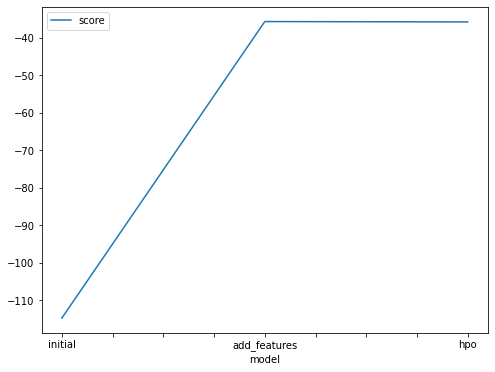

In [60]:
# the top model score from each training run
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [-114.751607,-35.744846 , -35.842606 ]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('img/model_train_score.png')

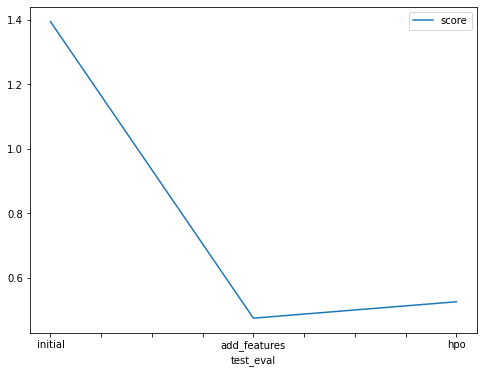

In [61]:
# kaggle scores
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.39358 , 0.47606, 0.52675]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('img/model_test_score.png')